In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Getting the data

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

--2020-09-10 21:04:58--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4004:801::2010, 2800:3f0:4004:800::2010, 2800:3f0:4004:806::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2800:3f0:4004:801::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   709KB/s    in 1m 45s  

2020-09-10 21:06:45 (640 KB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Model without data augmentation

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [6]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/100
100/100 [==============================] - 95s 946ms/step - loss: 0.6841 - accuracy: 0.5470 - val_loss: 0.6746 - val_accuracy: 0.5810
Epoch 2/100
100/100 [==============================] - 87s 873ms/step - loss: 0.6575 - accuracy: 0.6065 - val_loss: 0.6386 - val_accuracy: 0.6270
Epoch 3/100
100/100 [==============================] - 84s 836ms/step - loss: 0.6025 - accuracy: 0.6700 - val_loss: 0.6087 - val_accuracy: 0.6630
Epoch 4/100
100/100 [==============================] - 82s 823ms/step - loss: 0.5640 - accuracy: 0.6960 - val_loss: 0.5758 - val_accuracy: 0.7060
Epoch 5/100
100/100 [==============================] - 91s 911ms/step - loss: 0.5328 - accuracy: 0.7360 - val_loss: 0.5602 - val_accuracy: 0.7210
Epoch 6/100
100/100 [==============================] - 94s 939ms/step - loss: 0.5057 - accuracy: 0.7575 - val_loss: 0.5823 - val_accuracy: 0.7030
Epoch 7/100
100/100 [==============================] - 89s 886ms/step - loss: 0.4774 - accuracy: 0.7705 - val_loss: 0.5462 -

100/100 [==============================] - 139s 1s/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 1.5752 - val_accuracy: 0.7630
Epoch 58/100
100/100 [==============================] - 143s 1s/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 1.5682 - val_accuracy: 0.7700
Epoch 59/100
100/100 [==============================] - 131s 1s/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 1.6614 - val_accuracy: 0.7590
Epoch 60/100
100/100 [==============================] - 133s 1s/step - loss: 0.0088 - accuracy: 0.9990 - val_loss: 1.6263 - val_accuracy: 0.7650
Epoch 61/100
100/100 [==============================] - 134s 1s/step - loss: 0.0045 - accuracy: 0.9980 - val_loss: 1.5464 - val_accuracy: 0.7590
Epoch 62/100
100/100 [==============================] - 137s 1s/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 1.7616 - val_accuracy: 0.7580
Epoch 63/100
100/100 [==============================] - 137s 1s/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 1.7307 - val_accuracy: 0.761

In [12]:
import matplotlib.pyplot as plt
def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

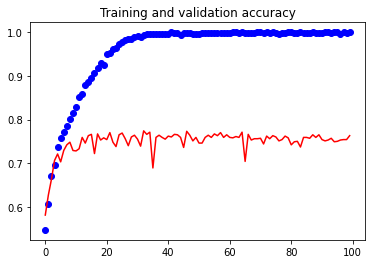

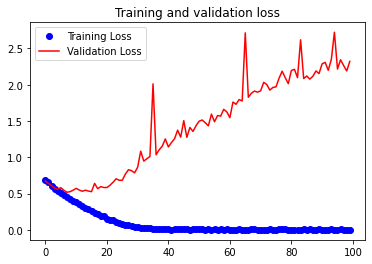

In [13]:
plot_metrics(history)

## Model with data augmentation

In [14]:
# Updated to do image augmentation
# Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [15]:
# Flow training images in batches of 20 using the new train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/100
100/100 [==============================] - 115s 1s/step - loss: 1.3756 - accuracy: 0.6530 - val_loss: 0.5539 - val_accuracy: 0.7360
Epoch 2/100
100/100 [==============================] - 109s 1s/step - loss: 0.6121 - accuracy: 0.6755 - val_loss: 0.5017 - val_accuracy: 0.7460
Epoch 3/100
100/100 [==============================] - 105s 1s/step - loss: 0.5646 - accuracy: 0.6970 - val_loss: 0.4968 - val_accuracy: 0.7510
Epoch 4/100
100/100 [==============================] - 99s 993ms/step - loss: 0.5474 - accuracy: 0.7195 - val_loss: 0.4989 - val_accuracy: 0.7590
Epoch 5/100
100/100 [==============================] - 105s 1s/step - loss: 0.5501 - accuracy: 0.7250 - val_loss: 0.4763 - val_accuracy: 0.7650
Epoch 6/100
100/100 [==============================] - 107s 1s/step - loss: 0.5418 - accuracy: 0.7250 - val_loss: 0.4872 - val_accuracy: 0.7790
Epoch 7/100
100/100 [==============================] - 114s 1s/step - loss: 0.5348 - accuracy: 0.7175 - val_loss: 0.5096 - val_accurac

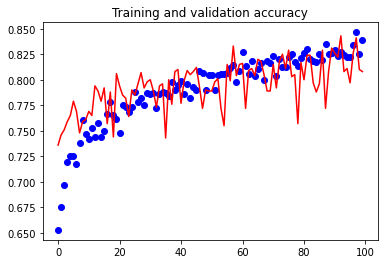

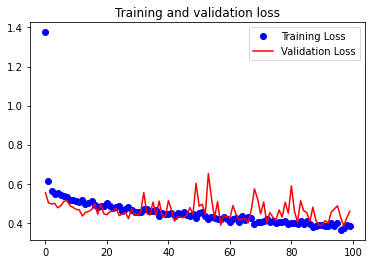

In [17]:
plot_metrics(history)

# Testing augmentation with horse-or-human dataset

In [18]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

--2020-09-12 12:18:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4004:808::2010, 2800:3f0:4004:805::2010, 2800:3f0:4004:804::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2800:3f0:4004:808::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  1.68MB/s    in 82s     

2020-09-12 12:20:18 (1.75 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-09-12 12:20:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4004:809::2010, 2800:3f0:4004:808::2010, 2800:3f0:4004:805::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2800:3f0:4004:809::2010|:443

In [19]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [20]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [21]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 110s 14s/step - loss: 0.6891 - accuracy: 0.5261 - val_loss: 0.6730 - val_accuracy: 0.7773
Epoch 2/100
8/8 [==============================] - 87s 11s/step - loss: 0.6854 - accuracy: 0.5929 - val_loss: 0.6497 - val_accuracy: 0.8320
Epoch 3/100
8/8 [==============================] - 86s 11s/step - loss: 0.6684 - accuracy: 0.6463 - val_loss: 0.6401 - val_accuracy: 0.5625
Epoch 4/100
8/8 [==============================] - 79s 10s/step - loss: 0.6392 - accuracy: 0.6908 - val_loss: 0.5883 - val_accuracy: 0.6797
Epoch 5/100
8/8 [==============================] - 79s 10s/step - loss: 0.6094 - accuracy: 0.7130 - val_loss: 0.7138 - val_accuracy: 0.5312
Epoch 6/100
8/8 [==============================] - 76s 9s/step - loss: 0.5670 - accuracy: 0.7386 - val_loss: 0.6219 - val_accuracy: 0.6172
Epoch 7/100
8/8 [==============================] - 78s 10s/step - loss: 0.5359 - accuracy: 0.7475 - val_loss: 0.8252 - val_accuracy: 0.5820
Epoch 8/100
8/8 [===

8/8 [==============================] - 88s 11s/step - loss: 0.1737 - accuracy: 0.9321 - val_loss: 3.7052 - val_accuracy: 0.5742
Epoch 60/100
8/8 [==============================] - 94s 12s/step - loss: 0.1945 - accuracy: 0.9199 - val_loss: 2.4899 - val_accuracy: 0.6523
Epoch 61/100
8/8 [==============================] - 95s 12s/step - loss: 0.1853 - accuracy: 0.9244 - val_loss: 3.1077 - val_accuracy: 0.6016
Epoch 62/100
8/8 [==============================] - 80s 10s/step - loss: 0.1593 - accuracy: 0.9366 - val_loss: 3.0072 - val_accuracy: 0.6289
Epoch 63/100
8/8 [==============================] - 81s 10s/step - loss: 0.1813 - accuracy: 0.9199 - val_loss: 2.8373 - val_accuracy: 0.6367
Epoch 64/100
8/8 [==============================] - 80s 10s/step - loss: 0.2318 - accuracy: 0.9143 - val_loss: 2.9903 - val_accuracy: 0.5820
Epoch 65/100
8/8 [==============================] - 78s 10s/step - loss: 0.1459 - accuracy: 0.9455 - val_loss: 3.0059 - val_accuracy: 0.6250
Epoch 66/100
8/8 [========

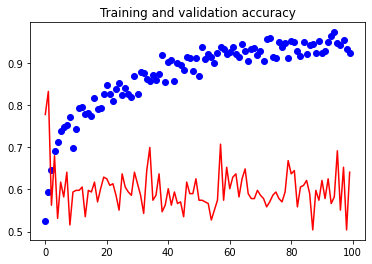

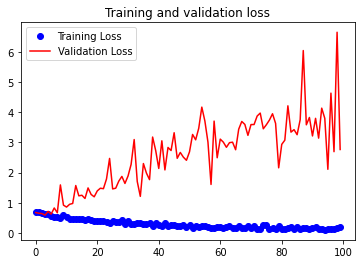

In [22]:
plot_metrics(history)